In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [130]:
data1 = pd.read_csv('C:\\Users\\Win10 Pro x64\\Documents\\Data_Weiterbildung\\IronHack\\Week_5\\Mid_bootcamp_project\\data\\clean\\theft_stats_clean.csv', sep=";")

In [131]:
data2 = pd.read_csv('C:\\Users\\Win10 Pro x64\\Documents\\Data_Weiterbildung\\IronHack\\Week_5\\Mid_bootcamp_project\\data\\clean\\traffic_accidents_stats_clean.csv', sep=";")

In [132]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22607 entries, 0 to 22606
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                22607 non-null  int64 
 1   called_at_date       22607 non-null  object
 2   start_date_incident  22607 non-null  object
 3   start_time_crime     22607 non-null  int64 
 4   end_date_incident    22607 non-null  object
 5   end_time_crime       22607 non-null  int64 
 6   lor                  22607 non-null  int64 
 7   loss_amount          22607 non-null  int64 
 8   attempt              22607 non-null  object
 9   bicycle_type         22607 non-null  object
 10  crime_type           22607 non-null  object
 11  record_type          22607 non-null  object
 12  district             22607 non-null  object
 13  Time_of_theft        22607 non-null  object
dtypes: int64(5), object(9)
memory usage: 2.4+ MB


In [133]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4251 entries, 0 to 4250
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   object_id                         4251 non-null   int64  
 1   federal_state                     4251 non-null   int64  
 2   district                          4251 non-null   object 
 3   lor_2021                          4251 non-null   float64
 4   year_accident                     4251 non-null   int64  
 5   month_accident                    4251 non-null   int64  
 6   hour_accident                     4251 non-null   int64  
 7   weekday                           4251 non-null   int64  
 8   accident_category                 4251 non-null   int64  
 9   accident_type                     4251 non-null   int64  
 10  accident_subtype                  4251 non-null   int64  
 11  light_conditions                  4251 non-null   int64  
 12  accide

In [134]:
theft_per_district=data1.groupby('district').size().sort_values(ascending=False).reset_index(name='theft_count')

In [135]:
theft_per_district

,district,theft_count
0,Mitte,3628
1,Friedrichshain-Kreuzberg,3282
2,Pankow,3186
3,Charlottenburg-Wilmersdorf,2252
4,Tempelhof-Schoeneberg,2021
5,Neukoelln,1703
6,Treptow-Koepenick,1587
7,Steglitz-Zehlendorf,1411
8,Lichtenberg,1289
9,Reinickendorf,819


In [136]:
accident_per_district=data2.groupby('district').size().sort_values(ascending=False).reset_index(name='accident_count')

In [137]:
accident_per_district

,district,accident_count
0,Mitte,803
1,Friedrichshain-Kreuzberg,582
2,Pankow,481
3,Charlottenburg-Wilmersdorf,470
4,Tempelhof-Schoeneberg,331
5,Treptow-Koepenick,317
6,Neukoelln,276
7,Steglitz-Zehlendorf,260
8,Lichtenberg,227
9,Reinickendorf,184


C:\Users\Win10 Pro x64\AppData\Local\Temp\ipykernel_13100\3713708045.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


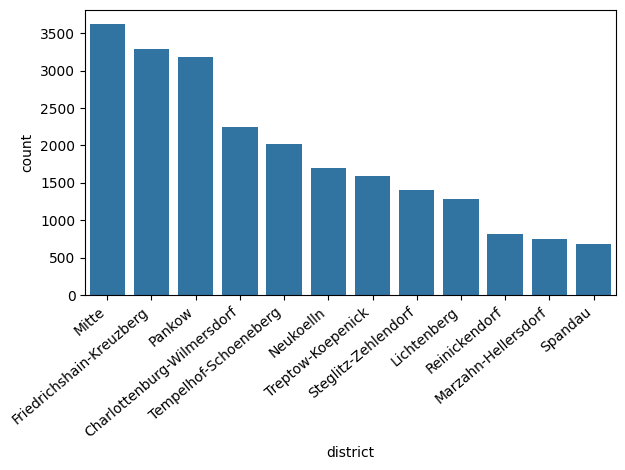

In [138]:
fig, ax = plt.subplots()
sns.countplot(x="district", data=data1, order = data1['district'].value_counts().index, ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

C:\Users\Win10 Pro x64\AppData\Local\Temp\ipykernel_13100\1347694743.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


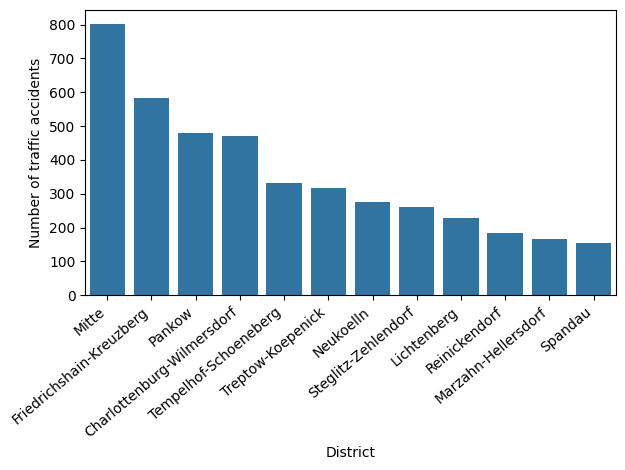

In [139]:
ax = sns.countplot(x="district", data=data2, order = data2['district'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("District")
ax.set_ylabel("Number of traffic accidents")
plt.tight_layout()
plt.show()

Conclusions:

C:\Users\Win10 Pro x64\AppData\Local\Temp\ipykernel_13100\1875963362.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


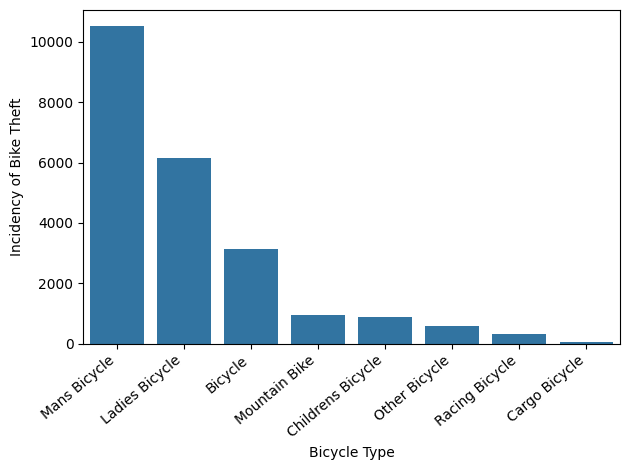

In [140]:
ax = sns.countplot(x="bicycle_type", data=data1, order = data1['bicycle_type'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("Bicycle Type")
ax.set_ylabel("Incidency of Bike Theft")
plt.tight_layout()
plt.show()

We transform the values of the column 'loss_amount' to Thousand € in order to be better able to show the cummulative amount of loss.

In [141]:
data1['loss_amount'] = data1['loss_amount'].div(1000)

In [142]:
loss_per_type=data1.groupby('bicycle_type')['loss_amount'].sum().sort_values(ascending=False).reset_index(name='loss_in_T€').round(0)
loss_per_type

,bicycle_type,loss_in_T€
0,Mans Bicycle,11291.0
1,Ladies Bicycle,5547.0
2,Bicycle,3851.0
3,Other Bicycle,1153.0
4,Mountain Bike,790.0
5,Racing Bicycle,381.0
6,Childrens Bicycle,359.0
7,Cargo Bicycle,135.0


C:\Users\Win10 Pro x64\AppData\Local\Temp\ipykernel_13100\481312091.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


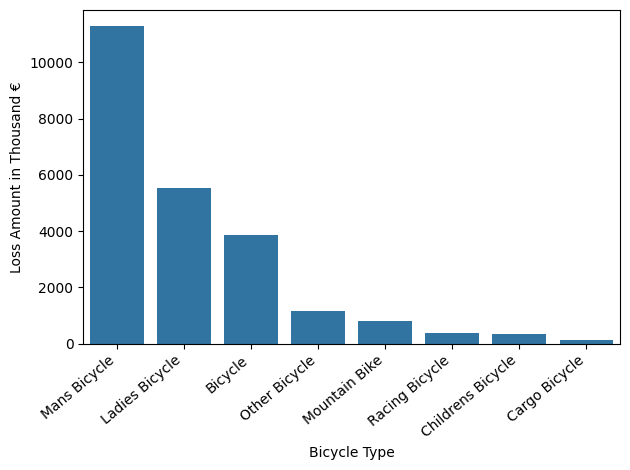

In [143]:
ax = sns.barplot(data1, x="bicycle_type", y= 'loss_amount', estimator="sum", order=loss_per_type['bicycle_type'], errorbar=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("Bicycle Type")
ax.set_ylabel("Loss Amount in Thousand €")
plt.tight_layout()
plt.show()

In [144]:
loss_per_type_ave=data1.groupby('bicycle_type')['loss_amount'].mean().sort_values(ascending=False).reset_index(name='loss_in_T€').round(3)
loss_per_type_ave

,bicycle_type,loss_in_T€
0,Cargo Bicycle,2.498
1,Other Bicycle,1.925
2,Bicycle,1.223
3,Racing Bicycle,1.176
4,Mans Bicycle,1.073
5,Ladies Bicycle,0.904
6,Mountain Bike,0.834
7,Childrens Bicycle,0.412


C:\Users\Win10 Pro x64\AppData\Local\Temp\ipykernel_13100\1803067167.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


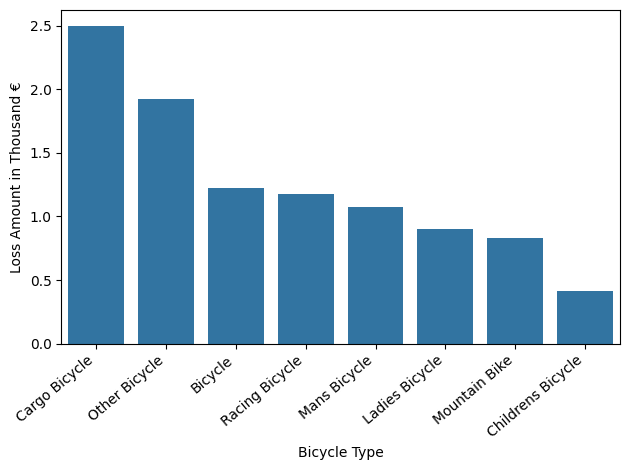

In [145]:
ax = sns.barplot(data1, x="bicycle_type", y= 'loss_amount', order=loss_per_type_ave['bicycle_type'], errorbar=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("Bicycle Type")
ax.set_ylabel("Loss Amount in Thousand €")
plt.tight_layout()
plt.show()

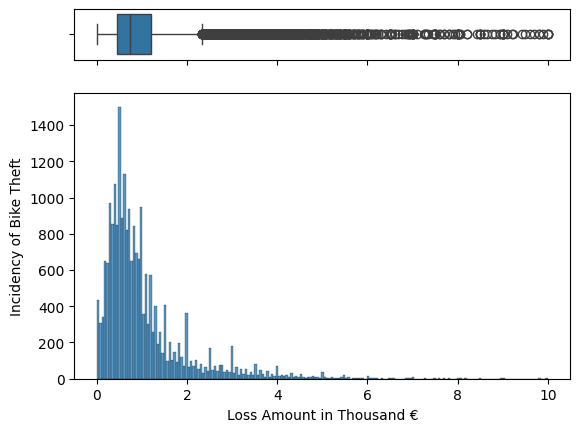

In [146]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=data1, x="loss_amount", ax=ax_box)
sns.histplot(data=data1, x="loss_amount", ax=ax_hist)
ax_hist.set_xlabel("Loss Amount in Thousand €")
ax_hist.set_ylabel("Incidency of Bike Theft")
plt.show()

C:\Users\Win10 Pro x64\AppData\Local\Temp\ipykernel_13100\471215963.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
C:\Users\Win10 Pro x64\AppData\Local\Temp\ipykernel_13100\471215963.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(severity)


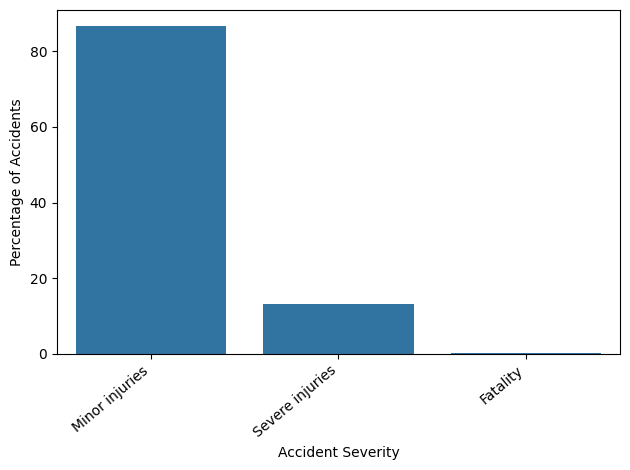

In [147]:
ax = sns.countplot(x="accident_category", stat="percent", data=data2, order = data2['accident_category'].value_counts().index)
#severity = {1:'deadly', 2:'severe injuries', 3: 'minor injuries'}
severity = ['Minor injuries', 'Severe injuries', 'Fatality']
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(severity)
ax.set_xlabel("Accident Severity")
ax.set_ylabel("Percentage of Accidents")
plt.tight_layout()
plt.show()

In [148]:
acc_per_cat=data2.groupby('accident_category').size().sort_values(ascending=False).reset_index(name='number_of_acc')
acc_per_cat

,accident_category,number_of_acc
0,3,3682
1,2,562
2,1,7


C:\Users\Win10 Pro x64\AppData\Local\Temp\ipykernel_13100\3083486262.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
C:\Users\Win10 Pro x64\AppData\Local\Temp\ipykernel_13100\3083486262.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(daytime)


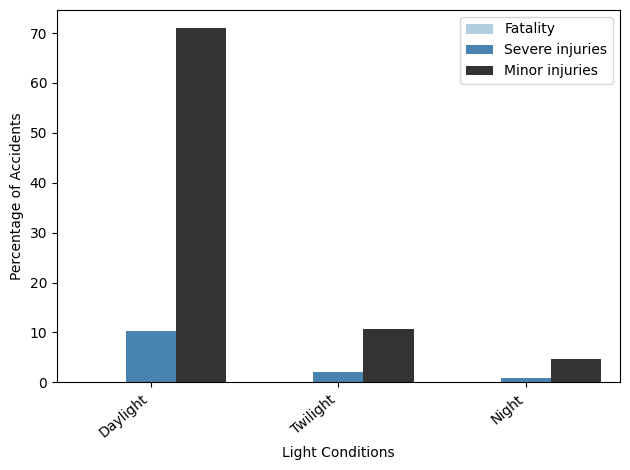

In [149]:
ax = sns.countplot(x="light_conditions", stat="percent", data=data2, order = data2['light_conditions'].value_counts().index, hue='accident_category',palette='Blues_d')
daytime = ['Daylight', 'Twilight', 'Night']
ax.legend().set_title('Accident severity')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(daytime)
ax.set_xlabel("Light Conditions")
ax.set_ylabel("Percentage of Accidents")
plt.legend(labels=['Fatality','Severe injuries', 'Minor injuries'])
plt.tight_layout()
plt.show()

In [150]:
fatal_acc = data2[data2['accident_category'] == 1]
fatal_acc.reset_index()

,index,object_id,federal_state,district,lor_2021,year_accident,month_accident,hour_accident,weekday,accident_category,...,accident_involving_passenger_car,accident_involving_pedestrian,accident_involving_motorcycle,accident_involving_truck,accident_involving_other,road_condition,coordinates_1a,coordinates_2a,coordinates_1b,coordinates_2b
0,74,218802,11,Pankow,3701660.0,2021,12,10,3,1,...,0,0,0,1,0,1,"800118,4462","5828988,95","13,42507767","52,5281482"
1,1275,215162,11,Pankow,3100102.0,2021,9,11,4,1,...,0,0,0,0,0,1,"804591,6408","5841473,57","13,50228673","52,63755925"
2,2081,213359,11,Treptow-Koepenick,9501838.0,2021,6,10,2,1,...,1,0,0,0,0,0,"818785,0631","5822133,61","13,69277359","52,4561311"
3,3560,209877,11,Neukoelln,8100104.0,2021,3,8,5,1,...,0,0,0,1,0,0,"800270,9511","5822151,402","13,42115515","52,46677666"
4,4012,113866,11,Pankow,3701660.0,2021,5,6,6,1,...,0,0,0,1,0,1,"800024,7394","5829001,809","13,4237121","52,52831503"
5,4172,112683,11,Friedrichshain-Kreuzberg,2500728.0,2021,5,12,5,1,...,0,0,0,1,1,0,"802989,8632","5827661,081","13,46606641","52,51465848"
6,4183,112591,11,Mitte,1300836.0,2021,10,12,6,1,...,0,0,0,1,0,0,"796288,9374","5830295,632","13,36995823","52,5419561"


C:\Users\Win10 Pro x64\AppData\Local\Temp\ipykernel_13100\2367469755.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
C:\Users\Win10 Pro x64\AppData\Local\Temp\ipykernel_13100\2367469755.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(daytime)


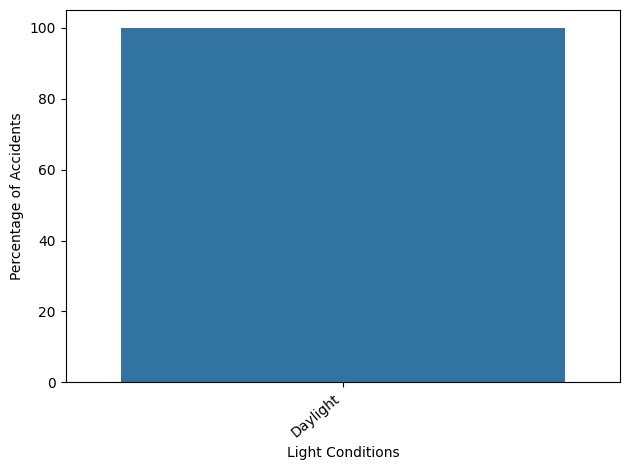

In [151]:
ax = sns.countplot(x="light_conditions", stat="percent", data=fatal_acc, order = fatal_acc['light_conditions'].value_counts().index)
daytime = ['Daylight', 'Twilight', 'Night']
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(daytime)
ax.set_xlabel("Light Conditions")
ax.set_ylabel("Percentage of Accidents")
plt.tight_layout()
plt.show()

Conclusion: in 2021 all the fatal accidents involving bicycles happened during the day. 

C:\Users\Win10 Pro x64\AppData\Local\Temp\ipykernel_13100\1063252956.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


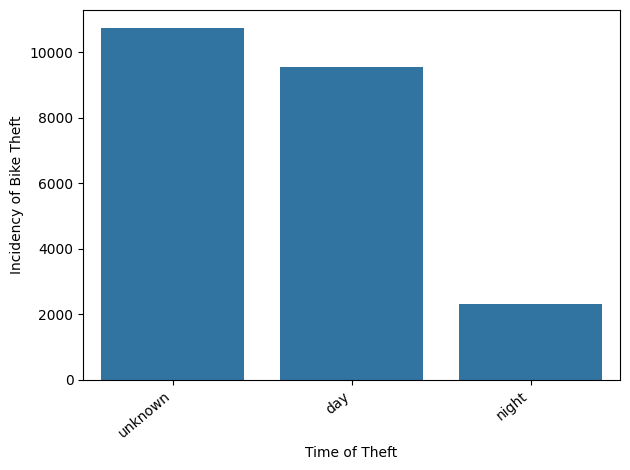

In [153]:
ax = sns.countplot(x="Time_of_theft", data=data1, order = data1['Time_of_theft'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("Time of Theft")
ax.set_ylabel("Incidency of Bike Theft")
plt.tight_layout()
plt.show()